# Assignment no 74 (K Nearest Neighbours - Implemetation) (22.4.23)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml

iris = load_iris()
boston = fetch_openml(name='Boston', version=1)

X_iris, y_iris = iris.data, iris.target
X_boston, y_boston = boston.data, boston.target

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
boston.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

### Q1. Write a Python code to implement the KNN classifier algorithm on load_iris dataset in sklearn.datasets.

In [4]:
from sklearn.model_selection import train_test_split

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.25, random_state=42)

In [5]:
X_iris_train.shape, X_iris_test.shape, y_iris_train.shape, y_iris_test.shape

((112, 4), (38, 4), (112,), (38,))

In [6]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [7]:
k_clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
k_clf

KNeighborsClassifier()

In [8]:
k_clf.fit(X_iris_train, y_iris_train)

KNeighborsClassifier()

In [9]:
y_pred_clf = k_clf.predict(X_iris_test)

In [10]:
y_pred_clf

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report

In [12]:
confusion_matrix(y_iris_test, y_pred_clf)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

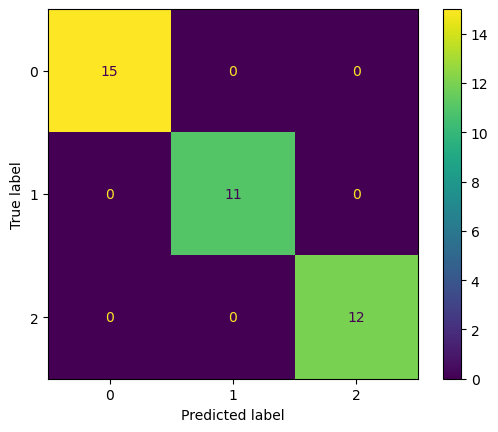

In [13]:
cm = confusion_matrix(y_iris_test, y_pred_clf, labels=k_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=k_clf.classes_)
disp.plot()

plt.show()

In [14]:
accuracy_score(y_iris_test, y_pred_clf)

1.0

In [15]:
print(classification_report(y_iris_test, y_pred_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



### Q2. Write a Python code to implement the KNN regressor algorithm on load_boston dataset in sklearn.datasets.

In [16]:
X_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB


In [17]:
X_boston[['CHAS','RAD']] = X_boston[['CHAS','RAD']].astype('float')

In [18]:
X_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [19]:
X_boston_train, X_boston_test, y_boston_train, y_boston_test = train_test_split(X_boston, y_boston, test_size=0.25, random_state=42)

In [20]:
X_boston_train.shape, X_boston_test.shape, y_boston_train.shape, y_boston_test.shape

((379, 13), (127, 13), (379,), (127,))

In [21]:
k_clf1 = KNeighborsRegressor(n_neighbors=5, algorithm='auto')
k_clf1

KNeighborsRegressor()

In [22]:
k_clf1.fit(X_boston_train, y_boston_train)

KNeighborsRegressor()

In [23]:
y_pred_clf1 = k_clf1.predict(X_boston_test)

In [24]:
y_pred_clf1

array([24.54, 29.34, 14.6 , 28.96, 16.74, 31.88, 19.74, 16.06, 18.02,
       21.18, 23.38, 20.04, 12.28, 21.6 , 23.7 , 22.22, 19.04, 14.06,
       35.14, 10.6 , 25.86, 29.34, 16.78, 21.08, 18.88, 23.16, 22.92,
       12.34, 23.38, 21.44, 22.68, 23.42, 10.3 , 30.04, 17.54, 21.12,
       21.66, 26.28, 22.52, 27.82, 21.18, 30.46, 38.16, 22.4 , 24.84,
       12.6 , 16.78, 28.96, 19.8 , 21.56, 22.44, 34.7 , 17.96, 21.18,
       30.36, 21.38, 12.5 , 35.14, 21.74, 20.6 , 25.3 , 38.82, 28.96,
       16.26, 30.46, 23.38, 12.26, 25.3 , 35.04, 12.34, 20.46, 22.52,
       14.82, 27.6 , 21.4 ,  8.98, 19.68, 38.16, 10.94, 15.04, 22.4 ,
       15.96, 26.3 , 12.24, 21.46, 34.  , 14.16, 22.58, 26.04, 17.86,
       23.24, 15.58, 17.48, 21.7 , 24.76, 17.86, 30.16, 10.76, 10.76,
       11.92, 21.8 , 21.4 , 23.16, 21.28, 22.22, 10.88, 23.96, 24.56,
       22.9 , 25.48,  9.98, 15.62, 23.28, 33.04, 38.6 , 13.46, 32.72,
       17.2 , 21.6 , 22.44, 24.78, 31.62,  9.78, 20.  , 23.8 , 23.7 ,
       25.5 ])

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
r2_score(y_boston_test, y_pred_clf1).round(2)

0.64

### Q3. Write a Python code snippet to find the optimal value of K for the KNN classifier algorithm using cross-validation on load_iris dataset in sklearn.datasets.

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
# Create a list of odd K for KNN

neighbors = list(range(1,50,1))

In [29]:
# Empty list that will hold cv scores

cv_scores = []

In [30]:
# Perform 10-fold cross validation on KNN for different values of k

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, iris.data, iris.target, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [31]:
cv_scores

[0.96,
 0.9533333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9800000000000001,
 0.9666666666666666,
 0.9666666666666666,
 0.9733333333333334,
 0.96,
 0.9666666666666666,
 0.96,
 0.9666666666666666,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9466666666666667,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9466666666666667,
 0.9400000000000001,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9400000000000001]

In [32]:
# Find the optimal value of k

optimal_k = neighbors[cv_scores.index(max(cv_scores))]

print(f"The optimal number of neighbors is {optimal_k}.")

The optimal number of neighbors is 13.


### Q4. Implement the KNN regressor algorithm with feature scaling on load_boston dataset in sklearn.datasets.

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
X_boston_train = scaler.fit_transform(X_boston_train)
X_boston_test = scaler.transform(X_boston_test)

In [36]:
knn = KNeighborsRegressor(n_neighbors=5)


knn.fit(X_boston_train, y_boston_train)

KNeighborsRegressor()

In [37]:
y_pred = knn.predict(X_boston_test)
y_pred

array([25.84, 33.64, 17.34, 23.1 , 18.58, 22.  , 19.64, 16.18, 19.32,
       19.44, 21.94, 20.34, 11.9 , 24.14, 18.46, 22.56, 20.3 ,  9.54,
       37.28, 14.2 , 25.7 , 26.34, 15.02, 21.18, 15.88, 16.66, 24.36,
       11.04, 21.42, 19.8 , 24.34, 23.56, 14.72, 21.88, 17.38, 19.08,
       31.24, 19.8 , 23.8 , 24.02, 19.3 , 29.24, 37.28, 20.54, 23.72,
       13.94, 15.98, 24.02, 19.  , 24.34, 21.12, 29.24, 16.76, 22.4 ,
       41.76, 21.48, 14.74, 35.06, 23.5 , 18.84, 24.1 , 33.7 , 25.56,
       20.98, 22.9 , 21.48, 14.18, 23.16, 30.96, 14.2 , 21.28, 22.34,
       13.16, 19.74, 24.22,  8.06, 19.68, 37.28, 11.34, 14.2 , 22.  ,
       10.34, 21.68, 11.02, 20.08, 24.6 , 14.94, 23.96, 24.6 , 18.1 ,
       24.5 ,  9.8 , 18.22, 20.88, 26.96, 18.22, 20.  ,  8.44, 11.44,
       11.48, 21.18, 24.46, 11.02, 19.94, 22.48, 11.06, 18.46, 23.92,
       21.4 , 26.6 ,  8.86, 12.5 , 20.66, 23.56, 29.36, 13.46, 36.68,
       15.62, 20.84, 26.3 , 19.86, 25.64,  9.96, 19.62, 23.44, 20.48,
       27.54])

In [38]:
mse = mean_squared_error(y_boston_test, y_pred)
print(f"Mean squared error: {mse:.2f}")

Mean squared error: 20.14


### Q5. Write a Python code snippet to implement the KNN classifier algorithm with weighted voting on load_iris dataset in sklearn.datasets.

In [39]:
# creating kNN classifier instance with defined weights

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [40]:
# Train the classifier on the training data

knn.fit(X_iris_train, y_iris_train)

KNeighborsClassifier(weights='distance')

In [41]:
# Evaluate the classifier on the test data

accuracy = knn.score(X_iris_test, y_iris_test)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


### Q6. Implement a function to standardise the features before applying KNN classifier.

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

def knn_with_standardization(X_train, y_train, X_test, n_neighbors=5):
    # Create a StandardScaler object
    scaler = StandardScaler()
    
    # Fit the scaler on the training data
    scaler.fit(X_train)
    
    # Transform the training and test data
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    # Create a k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Fit the classifier on the standardized training data
    knn.fit(X_train_std, y_train)
    
    # Predict the class labels of the test data
    y_pred = knn.predict(X_test_std)
    
    return y_pred

In [43]:
knn_with_standardization(X_iris_train, y_iris_train, X_iris_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

### Q7. Write a Python function to calculate the euclidean distance between two points.

In [44]:
import math

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points.
    
    Args:
        point1 (tuple): The first point, represented as a tuple of coordinates.
        point2 (tuple): The second point, represented as a tuple of coordinates.
        
    Returns:
        float: The Euclidean distance between the two points.
    """
    # Calculate the squared differences for each dimension
    squared_diffs = [(point1[i] - point2[i])**2 for i in range(len(point1))]
    
    # Calculate the sum of squared differences
    sum_squared_diffs = sum(squared_diffs)
    
    # Calculate the square root of the sum of squared differences
    distance = math.sqrt(sum_squared_diffs)
    
    return distance

In [45]:
point1 = (1, 2)
point2 = (4, 6)

distance = euclidean_distance(point1, point2)

print(f'The Euclidean distance between {point1} and {point2} is {distance:.2f}')

The Euclidean distance between (1, 2) and (4, 6) is 5.00


### Q8. Write a Python function to calculate the manhattan distance between two points.

In [46]:
def manhattan_distance(point1, point2):
    """
    Calculate the Manhattan distance between two points.
    
    Args:
        point1 (tuple): The first point, represented as a tuple of coordinates.
        point2 (tuple): The second point, represented as a tuple of coordinates.
        
    Returns:
        float: The Manhattan distance between the two points.
    """
    # Calculate the absolute differences for each dimension
    abs_diffs = [abs(point1[i] - point2[i]) for i in range(len(point1))]
    
    # Calculate the sum of absolute differences
    distance = sum(abs_diffs)
    
    return distance

In [47]:
point1 = (1, 2)
point2 = (4, 6)

distance = manhattan_distance(point1, point2)

print(f'The Euclidean distance between {point1} and {point2} is {distance:.2f}')

The Euclidean distance between (1, 2) and (4, 6) is 7.00
